In [125]:
import gzip
import os
import tempfile
from pathlib import Path

from celldreamer.paths import DATA_DIR
import numpy as np
import pooch
import scanpy as sc
import scvi
import seaborn as sns
import torch
import muon as mu

Read data 

In [102]:
adata_raw = sc.read_10x_h5("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/pbmc/pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5")
adata_raw.var_names_make_unique() 

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [103]:
adata_rna = sc.read(DATA_DIR / "raw" / "pbmc10k_multiome" / "pbmc_10k_rna.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [104]:
to_keep = np.intersect1d(adata_rna.obs.index, adata_raw.obs.index)

In [105]:
adata_rna.layers["X_counts"] = adata_raw[to_keep, adata_rna.var.index].X

In [106]:
adata_atac = sc.read(DATA_DIR / "raw" / "pbmc10k_multiome" / "pbmc_10k_atac.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [107]:
common_indexes = np.intersect1d(adata_atac.obs.index, adata_rna.obs.index)

Only keep common indices 

In [108]:
adata_rna = adata_rna[common_indexes]
adata_atac = adata_atac[common_indexes]  

# RNA

In [109]:
sc.tl.pca(adata_rna)
sc.pp.neighbors(adata_rna)
sc.tl.umap(adata_rna)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/home/icb/alessandro.palma/minicond

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


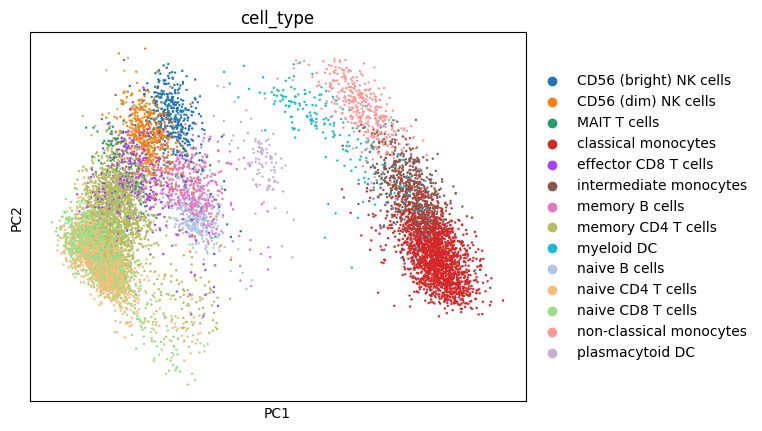

In [110]:
sc.pl.pca(adata_rna, color="cell_type")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


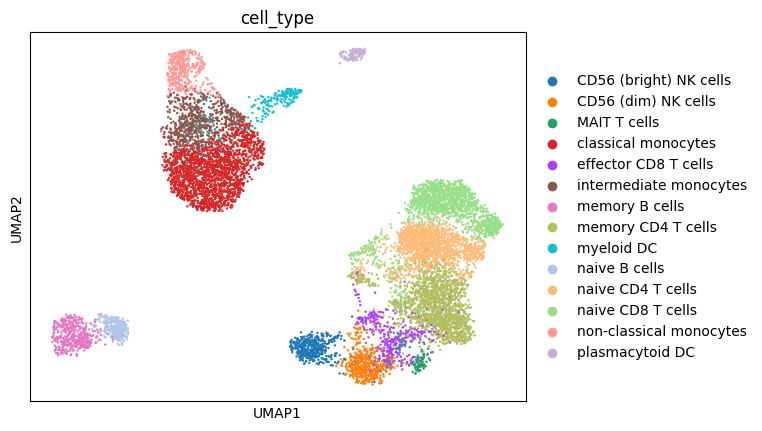

In [111]:
sc.pl.umap(adata_rna, color="cell_type")

## ATAC

In [112]:
sc.tl.pca(adata_atac)
sc.pp.neighbors(adata_atac)
sc.tl.umap(adata_atac)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


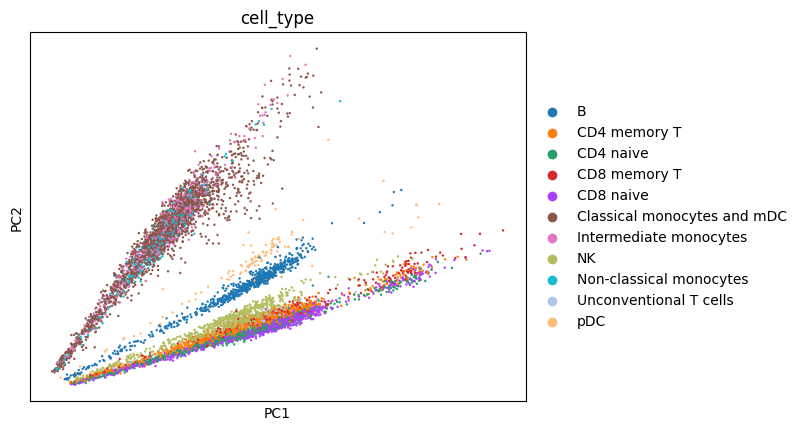

In [113]:
sc.pl.pca(adata_atac, color="cell_type")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


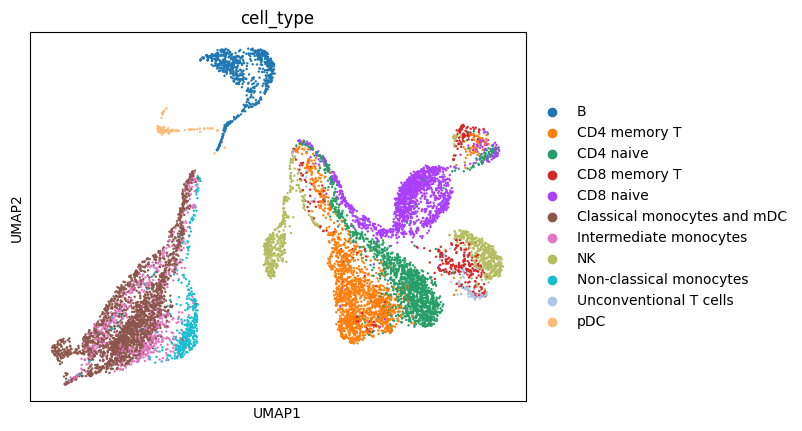

In [114]:
sc.pl.umap(adata_atac, color="cell_type")

In [115]:
adata_atac.layers["X_counts"] = adata_atac.layers["binary"].copy()
del adata_atac.layers["binary"]

Combine and save muon 

In [116]:
mdata_multiome = mu.MuData({"rna": adata_rna, "atac": adata_atac})

## Train/test split and save

In [117]:
# Generate random indices for train and test sets
total_samples = mdata_multiome.n_obs
train_frac = 0.8
train_size = int(total_samples * train_frac)
train_indices = np.random.choice(total_samples, size=train_size, replace=False)
test_indices = np.setdiff1d(np.arange(total_samples), train_indices)

# Separate data into train and test sets by indexing the Anndata object
train_mdata_multiome = mdata_multiome[train_indices, :]
test_mdata_multiome = mdata_multiome[test_indices, :]

In [120]:
mdata_multiome.write("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/pbmc/pbmc10k_multiome.h5mu")

In [121]:
train_mdata_multiome.write("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/pbmc/pbmc10k_multiome_train.h5mu")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/mudata/_core/mudata.py:760: ImplicitModificationWarning: Setting element `.varm['rna']` of view, initializing view as actual.
  attrm[mod] = mapping > 0
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/mudata/_core/mudata.py:760: ImplicitModificationWarning: Setting element `.varm['atac']` of view, initializing view as actual.
  attrm[mod] = mapping > 0


In [122]:
test_mdata_multiome.write("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/pbmc/pbmc10k_multiome_test.h5mu")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/mudata/_core/mudata.py:760: ImplicitModificationWarning: Setting element `.varm['rna']` of view, initializing view as actual.
  attrm[mod] = mapping > 0
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/mudata/_core/mudata.py:760: ImplicitModificationWarning: Setting element `.varm['atac']` of view, initializing view as actual.
  attrm[mod] = mapping > 0


# Sanity

In [128]:
import muon as mu

In [135]:
mud_data = mu.read("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/eurips/neurips_multiome_train.h5mu")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/mudata/_core/mudata.py:577: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_common = pd.concat(
